# Mini Project on Descriptive Analytics using file handling 

1. **Descriptive Analysis**

`Analyze the distribution of movie ratings. What percentage of movies have high (5), medium (3-4), and low (1-2) ratings?`

`Identify the top 10 most-rated movies`


2. **Genre Insights**

`Which movie genres are the most frequently rated?`

`Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`

3. **User Engagement Analysis**

`Identify the most active users (profession) based on the number of ratings they’ve given.`

`Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.`


4. **Rating Distribution by Demographics**

`Investigate how ratings vary by user demographic attributes (age, gender, occupation).`

`Are there specific genres preferred by certain age groups or occupations?`


5. **Top Performers**

`Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`

`Analyze the characteristics of top-rated movies (e.g., release year, genres).`


6. **Exploring Long Tail**

`Investigate the "long tail" of the dataset: How many movies receive very few ratings?`

`What are the characteristics of these less-rated movies compared to popular ones?`


7. **Tag Analysis**

`Analyze the tags associated with movies. What are the most frequently used tags?`

`Are tags consistent with movie genres?`

## You can do for self learning

8. **Visualization Projects**

`Create dashboards to visualize:`

`The distribution of ratings by genres and years.`

`Popular genres by user demographics.`

`Heatmaps showing the correlation between genres, user activity, and ratings`

In [3]:
# First Solution - Descriptive Analysys
"""1. **Descriptive Analysis**

#Analyze the distribution of movie ratings. What percentage of movies have high (5), medium (3-4), and low (1-2) ratings?`

#Identify the top 10 most-rated movies"""


ratings = open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\ratings.dat")
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\movies.dat")
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)
    

High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [4]:
# 2 solution - Genre Insights
"""**Genre Insights**

`Which movie genres are the most frequently rated?`

`Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`"""

movies  = open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\movies.dat")
movie_genres = {}

for line in movies:
    columns = line.strip().split("::")
    genre = columns[2].split('|') 
    movie_id = columns[0]
    movie_genres[movie_id] = genre

rating_genre_count = {}
rating_genre_sum = {}

ratings = open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\ratings.dat")

for line in ratings:
    columns = line.strip().split("::")
    movie_id = columns[1]
    rating = int(columns[2])

    if movie_id in movie_genres :
        for genre in movie_genres[movie_id]:
            if genre in rating_genre_count:
                rating_genre_count[genre] += 1
                rating_genre_sum[genre] += rating
            else:
                rating_genre_count[genre] = 1
                rating_genre_sum[genre] = 0
                


            

most_rated_genre = max(rating_genre_count, key=rating_genre_count.get)
print(f"The most frequently rated genre is: {most_rated_genre} with {rating_genre_count[most_rated_genre]} ratings.")

avg = {}
for genre in rating_genre_count:
    avg_rating = rating_genre_sum[genre] / rating_genre_count[genre]
    avg[genre] = avg_rating
    
sorted_data = sorted(avg.items() , key = lambda x : x[1] , reverse = True)

print("Consistently higher or lower rated genres accordi are:")
for genre, avg_rating in sorted_data:
    print(f"{genre}: {avg_rating:.2f}")


   


The most frequently rated genre is: Comedy with 356580 ratings.
Consistently higher or lower rated genres accordi are:
Film-Noir: 4.07
Documentary: 3.93
War: 3.89
Drama: 3.77
Crime: 3.71
Animation: 3.68
Mystery: 3.67
Musical: 3.67
Western: 3.64
Romance: 3.61
Thriller: 3.57
Comedy: 3.52
Action: 3.49
Adventure: 3.48
Sci-Fi: 3.47
Fantasy: 3.45
Children's: 3.42
Horror: 3.21


In [6]:
"""  **User Engagement Analysis**

`Identify the most active users (profession) based on the number of ratings they’ve given.`

`Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.`"""


user_data = open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\users.dat")
users = {}
for line in user_data:
    columns = line.strip().split("::")
    user_id = columns[0]
    gender = columns[1]
    age = int(columns[2])
    occupation = columns[3]
    users[user_id] = {"age": age, "gender": gender, "occupation": occupation}


occupation_count = {}
ratings_list = []
age_ratings = {"1-18": [], "25-35": [], "45-50": [], "56+": []}
gender_ratings = {"M": [], "F": []}
occupation_ratings = {}


ratings = open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\ratings.dat")
for line in ratings:
    columns = line.strip().split("::")
    user_id = columns[0]
    rating = int(columns[2])
    ratings_list.append({"user_id": user_id, "rating": rating})
    
    if user_id in users:
        user = users[user_id]
        age, gender, occupation = user["age"], user["gender"], user["occupation"]

    if 1 <= age <= 18:
        age_ratings["1-18"].append(rating)
    elif 25 <= age <= 35:
        age_ratings["25-35"].append(rating)
    elif 45 <= age <= 50:
        age_ratings["45-50"].append(rating)
    elif age >= 56:
        age_ratings["56+"].append(rating)

            # Update gender ratings
    gender_ratings[gender].append(rating)

            # Update occupation ratings
    if occupation not in occupation_ratings:
        occupation_ratings[occupation] = []
        occupation_ratings[occupation].append(rating)

            # Update occupation count
    if occupation in occupation_count:
        occupation_count[occupation] += 1
    else:
        occupation_count[occupation] = 1

def calculate_avg(ratings):
    return sum(ratings) / len(ratings) if ratings else 0


print("Average ratings by age group:")
for age_group, ratings in age_ratings.items():
    print(f"{age_group}: {calculate_avg(ratings):.2f}")

print("\nAverage ratings by gender:")
for gender, ratings in gender_ratings.items():
    print(f"{gender}: {calculate_avg(ratings):.2f}")

print("\nAverage ratings by occupation:")
for occupation, ratings in occupation_ratings.items():
    print(f"{occupation}: {calculate_avg(ratings):.2f}")

most_active_occupation = max(occupation_count, key=occupation_count.get)
print(f"\nThe most active occupation who rated is: {most_active_occupation} with {occupation_count[most_active_occupation]} ratings.")


    









Average ratings by age group:
1-18: 3.51
25-35: 3.57
45-50: 3.67
56+: 3.77

Average ratings by gender:
M: 3.57
F: 3.62

Average ratings by occupation:
10: 5.00
16: 5.00
15: 4.00
7: 5.00
20: 4.00
9: 5.00
1: 4.00
12: 3.00
17: 4.00
0: 3.00
3: 5.00
14: 4.00
4: 4.00
11: 2.00
8: 3.00
19: 5.00
2: 2.00
18: 3.00
5: 3.00
13: 3.00
6: 5.00

The most active occupation who rated is: 4 with 131032 ratings.


In [7]:
# 4 
with open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\users.dat", "r", encoding="latin-1") as user_data:
    users = {}
    for line in user_data:
        columns = line.strip().split("::")
        user_id, gender, age, occupation = columns[0], columns[1], int(columns[2]), columns[3]
        users[user_id] = {"age": age, "gender": gender, "occupation": occupation}

with open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\movies.dat", "r", encoding="latin-1") as movie_data:
    movies = {}
    for line in movie_data:
        columns = line.strip().split("::")
        movie_id, genres = columns[0], columns[2].split("|")  # Split genres for multiple entries
        movies[movie_id] = genres

# Define dictionaries 
age_ratings = {"1-18": [], "19-24": [], "25-35": [], "36-45": [], "46-50": [], "51-55": [], "56+": []}
gender_ratings = {"M": [], "F": []}
age_groups = {group: {} for group in age_ratings}
occupation_ratings = {}
occupations = {}


with open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\ratings.dat", "r", encoding="latin-1") as ratings:
    for line in ratings:
        try:
            columns = line.strip().split("::")
            user_id, movie_id, rating = columns[0], columns[1], int(columns[2])
            if user_id in users and movie_id in movies:
                user = users[user_id]
                genres = movies[movie_id]
                age, gender, occupation = user["age"], user["gender"], user["occupation"]

                
                if 1 <= age <= 18:
                    age_group = "1-18"
                elif 19 <= age <= 24:
                    age_group = "19-24"
                elif 25 <= age <= 35:
                    age_group = "25-35"
                elif 36 <= age <= 45:
                    age_group = "36-45"
                elif 46 <= age <= 50:
                    age_group = "46-50"
                elif 51 <= age <= 55:
                    age_group = "51-55"
                elif age >= 56:
                    age_group = "56+"
                else:
                    continue

                
                age_ratings[age_group].append(rating)

                # Update genre preferences for age groups
                for genre in genres:
                    if genre not in age_groups[age_group]:
                        age_groups[age_group][genre] = 1
                    else:
                        age_groups[age_group][genre] += 1

                # Update gender ratings
                gender_ratings[gender].append(rating)

                # Update occupation ratings
                if occupation not in occupation_ratings:
                    occupation_ratings[occupation] = []
                occupation_ratings[occupation].append(rating)

                # Update genre preferences for occupations
                if occupation not in occupations:
                    occupations[occupation] = {}
                for genre in genres:
                    if genre not in occupations[occupation]:
                        occupations[occupation][genre] = 1
                    else:
                        occupations[occupation][genre] += 1

        except (ValueError, IndexError) as e:
            with open("error_log.txt", "a") as log_file:
                log_file.write(f"Error: {e} in line: {line}\n")
            continue

# Function to calculate averages
def calculate_avg(ratings):
    return sum(ratings) / len(ratings) if ratings else 0

# Display results
print("Average ratings by age group:")
for age_group, ratings in age_ratings.items():
    print(f"{age_group}: {calculate_avg(ratings):.2f}")

print("\nAverage ratings by gender:")
for gender, ratings in gender_ratings.items():
    print(f"{gender}: {calculate_avg(ratings):.2f}")

print("\nAverage ratings by occupation:")
for occupation, ratings in occupation_ratings.items():
    print(f"{occupation}: {calculate_avg(ratings):.2f}")

print("\nAge Group Preferences:")
for age_group, genres in age_groups.items():
    print(f"{age_group}: {genres}")

print("\nOccupation Preferences:")
for occupation, genre_counts in occupations.items():
    print(f"{occupation}: {genre_counts}")


Average ratings by age group:
1-18: 3.51
19-24: 0.00
25-35: 3.57
36-45: 3.64
46-50: 3.71
51-55: 0.00
56+: 3.77

Average ratings by gender:
M: 3.57
F: 3.62

Average ratings by occupation:
10: 3.53
16: 3.60
15: 3.69
7: 3.60
20: 3.50
9: 3.66
1: 3.58
12: 3.65
17: 3.61
0: 3.54
3: 3.66
14: 3.62
4: 3.54
11: 3.62
8: 3.47
19: 3.41
2: 3.57
18: 3.53
5: 3.54
13: 3.78
6: 3.66

Age Group Preferences:
1-18: {'Drama': 65587, 'Animation': 12718, "Children's": 21261, 'Musical': 9202, 'Romance': 29255, 'Comedy': 81142, 'Action': 56764, 'Adventure': 30322, 'Fantasy': 9235, 'Sci-Fi': 33211, 'War': 12452, 'Thriller': 40701, 'Crime': 17074, 'Film-Noir': 2610, 'Mystery': 7321, 'Western': 3198, 'Horror': 17395, 'Documentary': 1211}
19-24: {}
25-35: {'Comedy': 212454, 'Action': 156181, 'Adventure': 79315, 'Mystery': 23339, 'Romance': 87333, 'Sci-Fi': 95489, 'War': 39344, 'Thriller': 114269, 'Drama': 210285, 'Fantasy': 21296, 'Horror': 46357, 'Animation': 24571, "Children's": 39747, 'Western': 11599, 'Musical': 

In [8]:
"""`Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`

`Analyze the characteristics of top-rated movies (e.g., release year, genres).`"""


movies = open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\movies.dat")
movies_data = {}
movies_genre = {}

for line in movies:
    columns = line.strip().split("::")
    movie_id = columns[0]
    movie_name = columns[1]
    genre = columns[2]
    movies_data[movie_id] = movie_name
    movies_genre[movie_id] = genre
    


movie_rating_count = {}
movie_rating_sum = {}

ratings = open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\ratings.dat")

for line in ratings:
    columns = line.strip().split("::")
    movie_id = columns[1]
    rating = float(columns[2])  

    if movie_id in movies_data:
        if movie_id in movie_rating_count:
            movie_rating_count[movie_id] += 1
            movie_rating_sum[movie_id] += rating
        else:
            movie_rating_count[movie_id] = 1
            movie_rating_sum[movie_id] = rating

# Calculate average ratings and filter based on minimum rating count 
min_ratings = 50  # Change this value to set the minimum number of ratings
avg = {}

for movie_id in movie_rating_count:
    if movie_rating_count[movie_id] >= min_ratings:  
        avg_rating = movie_rating_sum[movie_id] / movie_rating_count[movie_id]
        avg[movie_id] = avg_rating

sorted_data = sorted(avg.items(), key=lambda x: x[1], reverse=True)[:10]


print("Highest average rated movies are:")
seen_movies = set()  # To track if a movie has been displayed already
for movie_id, avg_rating in sorted_data:
    movie_name = movies_data[movie_id]
    genres = movies_genre[movie_id]
    if movie_name not in seen_movies:
        print(f"{movie_name} - Genres: {genres} | Average Rating: {avg_rating:.2f}")
        seen_movies.add(movie_name)


  
    

Highest average rated movies are:
Sanjuro (1962) - Genres: Action|Adventure | Average Rating: 4.61
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954) - Genres: Action|Drama | Average Rating: 4.56
Shawshank Redemption, The (1994) - Genres: Drama | Average Rating: 4.55
Godfather, The (1972) - Genres: Action|Crime|Drama | Average Rating: 4.52
Close Shave, A (1995) - Genres: Animation|Comedy|Thriller | Average Rating: 4.52
Usual Suspects, The (1995) - Genres: Crime|Thriller | Average Rating: 4.52
Schindler's List (1993) - Genres: Drama|War | Average Rating: 4.51
Wrong Trousers, The (1993) - Genres: Animation|Comedy | Average Rating: 4.51
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) - Genres: Film-Noir | Average Rating: 4.49
Raiders of the Lost Ark (1981) - Genres: Action|Adventure | Average Rating: 4.48


In [9]:
"""Investigate the "long tail" of the dataset: How many movies receive very few ratings?`

`What are the characteristics of these less-rated movies compared to popular ones?`"""


from collections import defaultdict


with open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\movies.dat", "r", encoding="latin-1") as movie_data:
    movies = {}
    for line in movie_data:
        columns = line.strip().split("::")
        movie_id, title, genres = columns[0], columns[1], columns[2].split("|")  # Split genres for multiple entries
        movies[movie_id] = {"title": title, "genres": genres}


movie_ratings_count = defaultdict(int)
movie_ratings_sum = defaultdict(int)

with open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\ratings.dat", "r", encoding="latin-1") as ratings:
    for line in ratings:
        try:
            columns = line.strip().split("::")
            movie_id, rating = columns[1], int(columns[2])
            movie_ratings_count[movie_id] += 1
            movie_ratings_sum[movie_id] += rating
        except (ValueError, IndexError) as e:
            with open("error_log.txt", "a") as log_file:
                log_file.write(f"Error: {e} in line: {line}\n")
            continue


low_rating_threshold = 10  # Movies with <= 10 ratings 
long_tail_movies = {movie_id: count for movie_id, count in movie_ratings_count.items() if count <= low_rating_threshold}
popular_movies = {movie_id: count for movie_id, count in movie_ratings_count.items() if count > low_rating_threshold}


def calculate_avg_rating(movie_id):
    count = movie_ratings_count[movie_id]
    total = movie_ratings_sum[movie_id]
    return total / count if count > 0 else 0

long_tail_characteristics = [
    {
        "title": movies[movie_id]["title"],
        "genres": movies[movie_id]["genres"],
        "avg_rating": calculate_avg_rating(movie_id),
        "num_ratings": count,
    }
    for movie_id, count in long_tail_movies.items()
]

popular_characteristics = [
    {
        "title": movies[movie_id]["title"],
        "genres": movies[movie_id]["genres"],
        "avg_rating": calculate_avg_rating(movie_id),
        "num_ratings": count,  
        }
    for movie_id, count in popular_movies.items()
]


print("Long Tail Movies (<= 10 ratings):")
for movie in sorted(long_tail_characteristics, key=lambda x: x["num_ratings"])[:10]:
    print(f"Title: {movie['title']}, Genres: {', '.join(movie['genres'])},"
          f"Avg Rating: {movie['avg_rating']:.2f}, Num Ratings: {movie['num_ratings']}")

print("\nPopular Movies (> 10 ratings):")
for movie in sorted(popular_characteristics, key=lambda x: x["num_ratings"], reverse=True)[:10]:  # Top 10 popular movies
    print(f"Title: {movie['title']}, Genres : {','.join(movie['genres'])},"
          f" Avg Rating: {movie['avg_rating']:.2f}, Num Ratings: {movie['num_ratings']}")






Long Tail Movies (<= 10 ratings):
Title: Baby, The (1973), Genres: Horror,Avg Rating: 5.00, Num Ratings: 1
Title: Diebinnen (1995), Genres: Drama,Avg Rating: 1.00, Num Ratings: 1
Title: Mouth to Mouth (Boca a boca) (1995), Genres: Comedy,Avg Rating: 4.00, Num Ratings: 1
Title: Wend Kuuni (God's Gift) (1982), Genres: Drama,Avg Rating: 4.00, Num Ratings: 1
Title: Bloody Child, The (1996), Genres: Drama, Thriller,Avg Rating: 1.00, Num Ratings: 1
Title: Small Faces (1995), Genres: Drama,Avg Rating: 2.00, Num Ratings: 1
Title: Billy's Holiday (1995), Genres: Drama,Avg Rating: 3.00, Num Ratings: 1
Title: For Ever Mozart (1996), Genres: Drama,Avg Rating: 3.00, Num Ratings: 1
Title: Trois (2000), Genres: Thriller,Avg Rating: 2.00, Num Ratings: 1
Title: Open Season (1996), Genres: Comedy,Avg Rating: 3.00, Num Ratings: 1

Popular Movies (> 10 ratings):
Title: American Beauty (1999), Genres : Comedy,Drama, Avg Rating: 4.32, Num Ratings: 3428
Title: Star Wars: Episode IV - A New Hope (1977), Genre

In [10]:
"""Analyze the tags associated with movies. What are the most frequently used tags?`

`Are tags consistent with movie genres?`
 """


movies = {}
with open(r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\movies.dat", "r", encoding="latin-1") as movie_data:
    for line in movie_data:
        columns = line.strip().split("::")
        movie_id, title, genres = columns[0], columns[1], columns[2].split("|")  # Split genres
        movies[movie_id] = {"title": title, "genres": genres}


genre_count = {}


for movie in movies.values():
    for genre in movie["genres"]:
        genre_count[genre] = genre_count.get(genre, 0) + 1


sorted_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)


print("Most Frequent Genres:")
for genre, count in sorted_genres:
    print(f"Genre: {genre}, Count: {count}")


Most Frequent Genres:
Genre: Drama, Count: 1603
Genre: Comedy, Count: 1200
Genre: Action, Count: 503
Genre: Thriller, Count: 492
Genre: Romance, Count: 471
Genre: Horror, Count: 343
Genre: Adventure, Count: 283
Genre: Sci-Fi, Count: 276
Genre: Children's, Count: 251
Genre: Crime, Count: 211
Genre: War, Count: 143
Genre: Documentary, Count: 127
Genre: Musical, Count: 114
Genre: Mystery, Count: 106
Genre: Animation, Count: 105
Genre: Fantasy, Count: 68
Genre: Western, Count: 68
Genre: Film-Noir, Count: 44


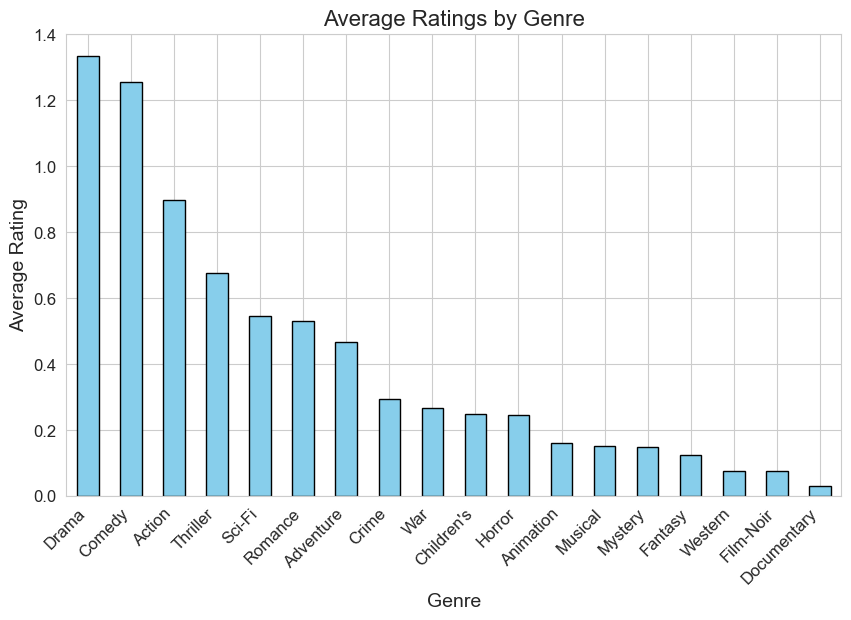

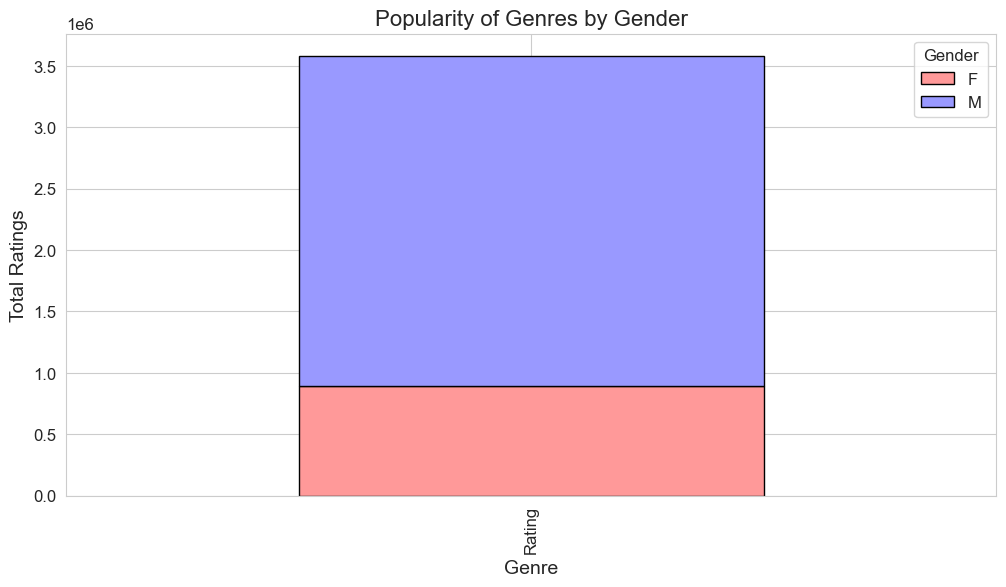

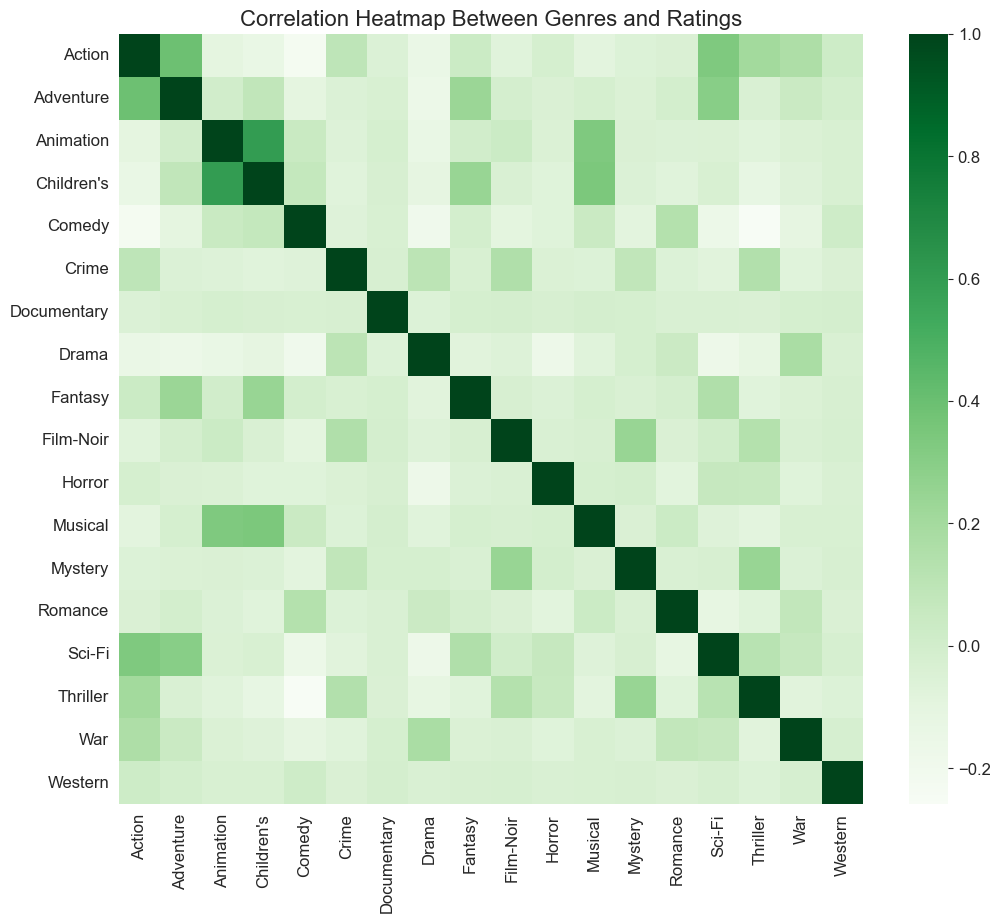

Sample Data Preview:


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,ZipCode,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    
    try:
        
        ratings_file = r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\ratings.dat" 
        movies_file = r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\movies.dat"
        users_file = r"C:\Users\sbc\OneDrive\Desktop\NexGen Internship\mini project1\users.dat"  

        
        ratings = pd.read_csv(ratings_file, sep="::", names=["UserID", "MovieID", "Rating", "Timestamp"], engine="python", encoding="ISO-8859-1")
        movies = pd.read_csv(movies_file, sep="::", names=["MovieID", "Title", "Genres"], engine="python", encoding="ISO-8859-1")
        users = pd.read_csv(users_file, sep="::", names=["UserID", "Gender", "Age", "Occupation", "ZipCode"], engine="python", encoding="ISO-8859-1")

        return ratings, movies, users

    except Exception as e:
        print(f"Error while loading data: {e}")
        return None, None, None


def create_visualizations(ratings, movies, users):
    
    
    merged_data = pd.merge(pd.merge(ratings, users, on="UserID"), movies, on="MovieID")

    sns.set_style("whitegrid")
    plt.rcParams.update({'font.size': 12})

    genres_data = merged_data["Genres"].str.get_dummies("|").multiply(merged_data["Rating"], axis=0)
    genre_ratings = genres_data.sum() / genres_data.count()
    #1
    plt.figure(figsize=(10, 6))
    genre_ratings.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Average Ratings by Genre", fontsize=16)
    plt.xlabel("Genre", fontsize=14)
    plt.ylabel("Average Rating", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # 2. Popular Genres by User Demographics 
    gender_genre = merged_data.groupby(["Gender"]).sum(numeric_only=True).T
    gender_genre = gender_genre[~gender_genre.index.str.contains("UserID|MovieID|Age|Occupation|ZipCode|Timestamp")]
    gender_genre.plot(kind="bar", figsize=(12, 6), stacked=True, color=["#FF9999", "#9999FF"], edgecolor="black")
    plt.title("Popularity of Genres by Gender", fontsize=16)
    plt.xlabel("Genre", fontsize=14)
    plt.ylabel("Total Ratings", fontsize=14)
    plt.legend(title="Gender", loc="upper right")
    plt.show()

    # 3. Heatmap: Correlation between Genres, User Activity, and Ratings
    genres_corr = genres_data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(genres_corr, annot=False, cmap="Greens", cbar=True)  # Changed color map to 'Greens'
    plt.title("Correlation Heatmap Between Genres and Ratings", fontsize=16)
    plt.show()

    print("Sample Data Preview:")
    display(merged_data.head())


def main():
    
    ratings, movies, users = load_data()
    if ratings is not None and movies is not None and users is not None:
        create_visualizations(ratings, movies, users)
    else:
        print("Error: Data could not be loaded.")


if __name__ == "__main__":
    main()


In [52]:
#Tag Analysis

movies = open(r"C:\Users\janvi\NextGen Internship\Training phase\ml-1m\ml-1m\movies.dat")

movie_genre = dict()
#genre = list()
for line in movies :
    line = line.strip()
    columns = list(map(str, line.split('::')))
    #print(columns[2])
    all_genre = columns[2].split('|')
    
    
    for genre in all_genre :
        if genre in movie_genre :
            movie_genre[genre] += 1 
            continue
        else :
            movie_genre[genre] = 1

sorted_genre = sorted(movie_genre.items(), key = lambda x:x[1], reverse=True)
print("Most frequently used tags is : ")
for top_genre in sorted_genre:
    print(f" {top_genre[0]} : {top_genre[1]} -----------------times")


Most frequently used tags is : 
 Drama : 1603 -----------------times
 Comedy : 1200 -----------------times
 Action : 503 -----------------times
 Thriller : 492 -----------------times
 Romance : 471 -----------------times
 Horror : 343 -----------------times
 Adventure : 283 -----------------times
 Sci-Fi : 276 -----------------times
 Children's : 251 -----------------times
 Crime : 211 -----------------times
 War : 143 -----------------times
 Documentary : 127 -----------------times
 Musical : 114 -----------------times
 Mystery : 106 -----------------times
 Animation : 105 -----------------times
 Fantasy : 68 -----------------times
 Western : 68 -----------------times
 Film-Noir : 44 -----------------times


avg_value : genres
Adventure     9.728032e+08
Fantasy       9.728032e+08
Children's    9.726568e+08
Romance       9.724933e+08
Animation     9.723765e+08
Drama         9.723088e+08
Comedy        9.721763e+08
Name: rating, dtype: float64


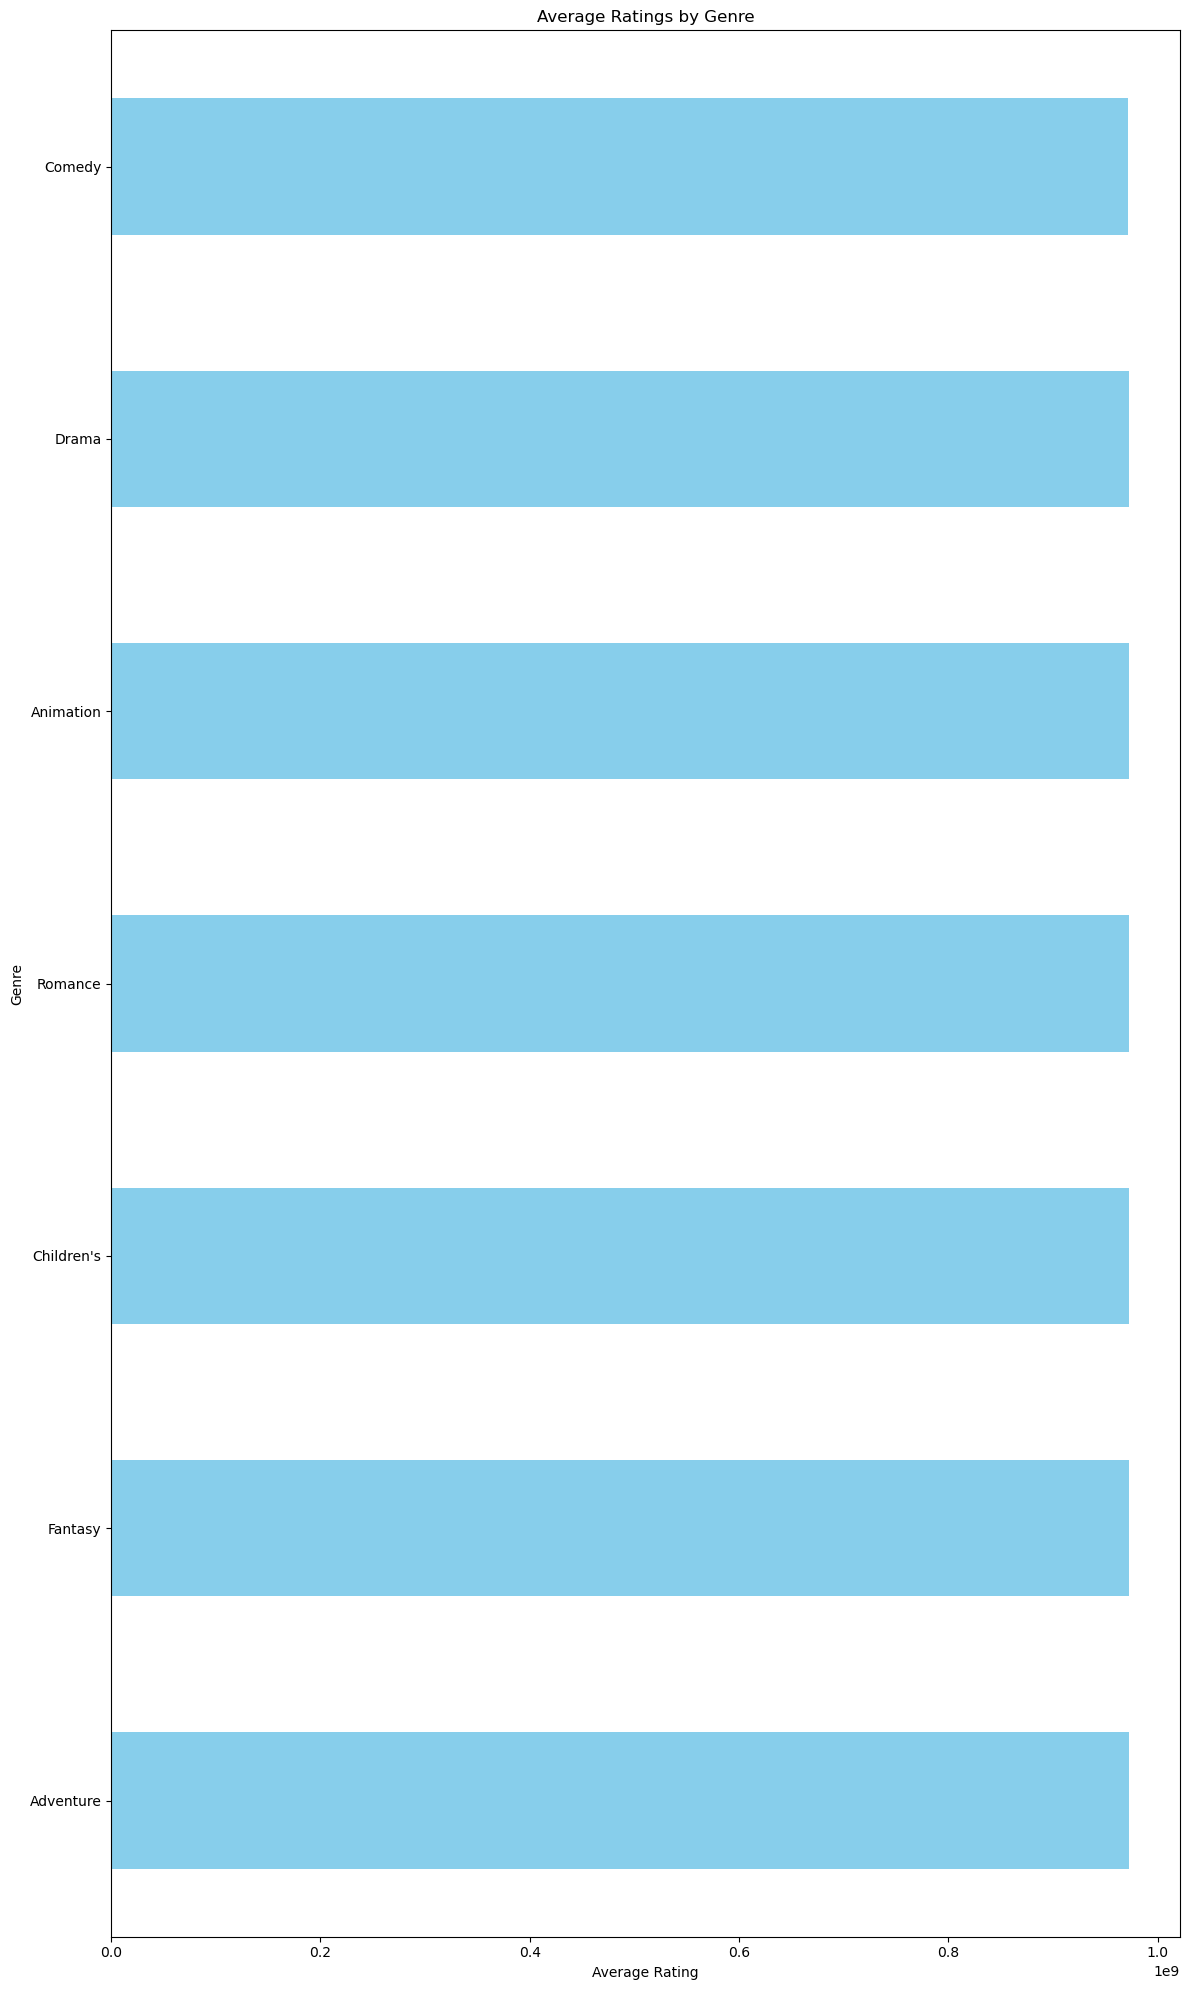

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load ratings and movie data
ratings_df = pd.read_csv(r"C:\Users\janvi\NextGen Internship\Training phase\ml-1m\ml-1m\ratings.dat", sep="::", engine="python", names=["user_id", "movie_id", "rating"], header=None)
movies_df = pd.read_csv(r"C:\Users\janvi\NextGen Internship\Training phase\ml-1m\ml-1m\movies.dat", sep="::", engine="python", names=["movie_id", "title", "genres"], header=None, encoding="latin-1")

# Merge Ratings with Movie Genres
merged_df = pd.merge(ratings_df, movies_df, on="movie_id")

# Split genres into a list
merged_df["genres"] = merged_df["genres"].str.split("|")

# Create a new DataFrame where each row represents a movie's rating for a specific genre
expanded_df = merged_df.explode("genres")

# Calculate average rating per genre
avg_ratings_by_genre = expanded_df.groupby("genres")["rating"].mean().sort_values(ascending=False)
print(f"avg_value : {avg_ratings_by_genre}")

# Plot the distribution of ratings by genres
plt.figure(figsize=(12,8))
avg_ratings_by_genre.plot(kind='barh', color='skyblue')
plt.title("Average Ratings by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()

plt.show()
